### PHYS 310 in-class fitting example #1

Fitting of linear models. This notebook uses `curve_fit()` from the `optimize` submodule of 
`scipy`.  (This function can be used to fit linear and non-linear models. When used for 
linear models no initial parameter estimates are required.)

<b>NOTE:</b> Linear models are not necessarily linear functions.  In this notebook I fit two 
functions:
+ $f(x) = mx + b$, fitting for $m$ and $b$
+ $g(x) = mx + b + cx^2$, fitting for m, b, and c

Both of these are models that are linear <i>in the fit parameters</i>, although $g$ is not linear
in the independent variable $x$.

Marty Ligare, August 2020

modified by Katharina Vollmayr-Lee February 2022

In [1]:
import numpy as np
from scipy import optimize
import urllib

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook 
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size

#### Self-Defined Functions

Usually all self-defined functions are at the beginning of the program. I put the definitions here however in comment, so that you can see the function definition below where we then do a fit with it.

In [3]:
#def f(x,m,b):
#    return m*x + b
#
#def g(x,m,b,c):
#    return m*x + b + c*x**2 

#### Load data from URL
Below you practice to download the data file to a local directory, and import it using `np.loadtxt`, but here we 
skip the intermediate step and load it directly from the URL to the notebook.

Each row in file gives information on single data point, $x_i$, $y_i$, $\alpha_i$. The option 
`unpack = True` takes transpose of the data file array so that all values of `x` are in a single 
array, and similarly for `y` and `u` (the uncertainty).  Notice that by default `np.loadtxt()` treats
`#` as the comment character.

In [4]:
link = 'http://www.eg.bucknell.edu/~phys310/skills/data_analysis/a.dat'
fh = urllib.request.urlopen(link)
xdata, ydata, udata = np.loadtxt(fh, unpack=True)
#print(xdata,ydata,udata)

<IPython.core.display.Javascript object>


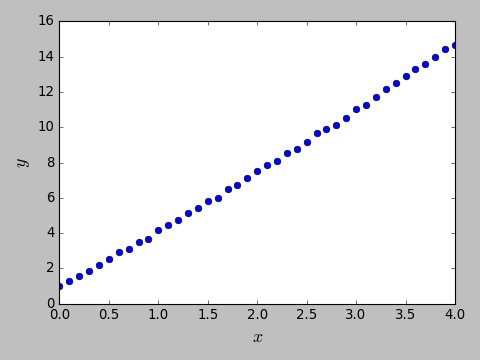

Text(0, 0.5, '$y$')

In [5]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='o')
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.scatter(xdata,ydata)
# KVL: if above %matplotlib notebook doesn't work uncomment next line
#plt.show()

#### Load data from File
Since for most labs you will have a file with your data instead of the file of a URL link, let us practice here how to use `np.loadtext` directly on a file. So download from the Phys 310 webpage the file `a.dat` into your local directory. Next we import it using `np.loadtxt`.

Each row in this file gives information on single data point, $x_i$, $y_i$, $\alpha_i$. The option 
`unpack = True` takes transpose of the data file array so that all values of `x` are in a single 
array, and similarly for `y` and `u` (the uncertainty).  Notice that by default `np.loadtxt()` treats
`#` as the comment character.

In [6]:
xdata, ydata, udata = np.loadtxt("a.dat", unpack=True)
#print(xdata,ydata,udata)

And here other loadtxt command, where you first load the data into an array and then transpose and assign the x, y, and u data.

In [7]:
data = np.loadtxt("a.dat")  # each line i data point x_i,y_i,u_i
xdata = data.T[0]                     # The .T gives transpose of array
ydata = data.T[1]
udata = data.T[2]
#print(udata)

#### Plot Raw Data

<IPython.core.display.Javascript object>


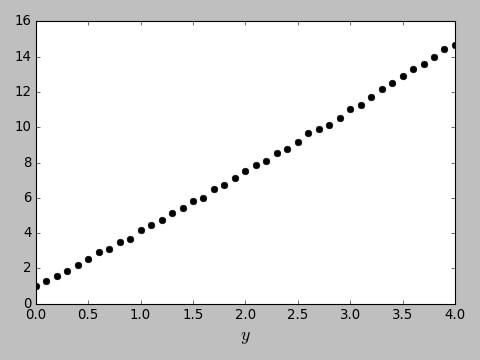

Text(0.5, 0, '$y$')

In [8]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
plt.xlabel('$x$')
plt.xlabel('$y$')
#plt.scatter(xdata,ydata);
#plt.show()

#### Define Fit Function

In [9]:
def f(x,m,b):
    return m*x + b

#### Linear Curve Fit

Next we do a Curve Fit. Since this is a linear fit we do not need to provide initial parameters. 

#### Fit data, and plot fit-function with optimized parameters
+ `curve_fit` returns best-fit parameters ($\rightarrow$ `popt`)  and the covariance matrix ($\rightarrow$ `pcov`).
+ Uncertainties in the fit parameters are given by the square roots of the diagonal elements of the covariance matrix.

In [10]:
popt, pcov = optimize.curve_fit(f,xdata,ydata,sigma=udata, absolute_sigma=True)
print(popt)
print(pcov)
print ("m= ",popt[0]," +- ",np.sqrt(pcov[0,0]))
print ("b= ",popt[1]," +- ",np.sqrt(pcov[1,1]))

[3.44553322 0.70261951]
[[ 4.35539990e-05 -8.71079984e-05]
 [-8.71079984e-05  2.35191613e-04]]
m=  3.445533218244309  +-  0.006599545360593557
b=  0.702619508215591  +-  0.015335958160925367


In [11]:
# fit for data without error bars
#popt, pcov = optimize.curve_fit(f,xdata,ydata)
#print ("m= ",popt[0]," +- ",np.sqrt(pcov[0,0]))
#print ("b= ",popt[1]," +- ",np.sqrt(pcov[1,1]))

#### Plot fit-function with optimized parameters

<IPython.core.display.Javascript object>


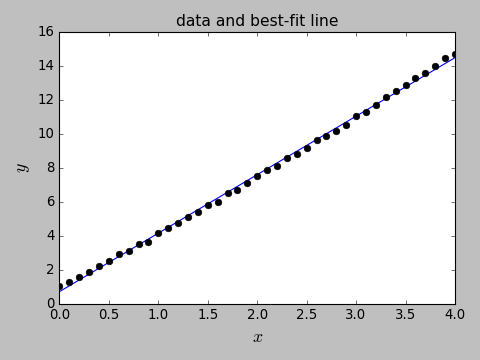

In [12]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
xc = np.linspace(0,4,100)
plt.plot(xc, f(xc,*popt))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('data and best-fit line');
#plt.show()

#### Calculate and plot residuals

$$ r_i = y_i - f(x_i) $$

In [13]:
r = ydata - f(xdata,*popt) # same as    r = ydata - f(xdata,popt[0],popt[1])

<IPython.core.display.Javascript object>


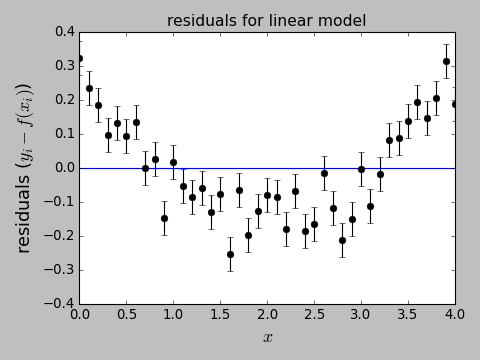

In [14]:
plt.figure()
plt.errorbar(xdata,r,udata, fmt='ok')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('residuals ($y_i-f(x_i)$)')
plt.title('residuals for linear model')
plt.show()

#### Calculate $\chi^2$

$$ \chi^2 = \sum_i \frac{(y_i - f(x_i))^2}{\alpha_i^2}   $$

In [15]:
chisq = np.sum(r**2/udata**2)
print(chisq, len(r))

363.1965242552121 41


The value of $\chi^2$ is much larger than the number of data points.

That, coupled with the obvious non-random pattern in the 
residuals, indicates that the data is not consistent with the 
model.

#### Try fitting to a quadratic
This is still a linear model, i.e., it is linear in the fit parameters `a`, `b`, and `c`).

In [16]:
def g(x,m,b,c):
   return m*x + b + c*x**2 

In [17]:
popt, pcov = optimize.curve_fit(g,xdata,ydata,sigma=udata, absolute_sigma=True)
print(popt)
for i in range(len(popt)):
    print(np.sqrt(pcov[i,i]))

[3.01077743 0.98521077 0.10868895]
0.025823769215744613
0.022328040820968644
0.006241559487942377


#### Best fit parameters
+ $m = 3.01 \pm 0.02$
+ $b = 0.98 \pm 0.02$
+ $c = 0.108 \pm 0.006$ 

<IPython.core.display.Javascript object>


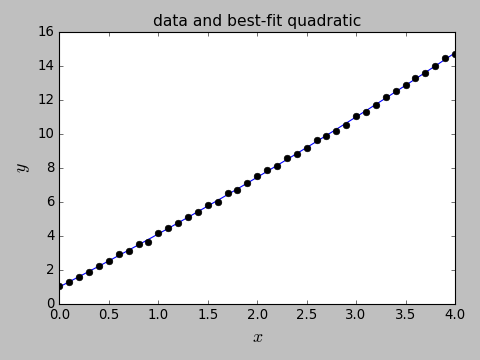

In [18]:
plt.figure()
plt.errorbar(xdata,ydata,udata, fmt='ok')
xc = np.linspace(0,4,100)
plt.plot(xc, g(xc,*popt))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('data and best-fit quadratic');

#### Calculate new residuals

In [19]:
r = ydata - g(xdata,*popt)

<IPython.core.display.Javascript object>


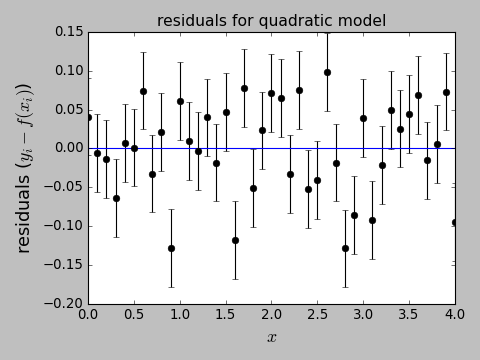

In [20]:
plt.figure()
plt.errorbar(xdata,r,udata, fmt='ko')
plt.axhline(0)
plt.xlabel('$x$')
plt.ylabel('residuals ($y_i-f(x_i)$)')
plt.title('residuals for quadratic model');

#### New $\chi^2$

In [21]:
chisq = np.sum(r**2/udata**2)
print(chisq, len(r))

59.957924032869876 41


#### Data looks consistent with quadratic model.

#### Version information

+ %version_information is an IPython magic extension for showing version information for dependency modules in a notebook; 

+ See `https://github.com/jrjohansson/version_information`

+ `%version_information` is available on Bucknell computers on the linux network.  You can easily install it on
any computer.

In [22]:
%load_ext version_information

In [23]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.7.8 64bit [GCC 7.5.0]
IPython 7.17.0
OS Linux 3.10.0 1127.19.1.el7.x86_64 x86_64 with centos 7.9.2009 Core
numpy 1.19.1
scipy 1.5.0
matplotlib 3.3.0
Mon Feb 07 22:47:07 2022 EST